# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#checkapi = requests.get("http://api.openweathermap.org/data/2.5/weather?appid=3dd7ee89d375aae64434e675c2fc81f3&q=chicago").json()
#pprint(checkapi)

In [5]:

city_info_df = pd.DataFrame(cities, columns=["city"])
city_info_df

,city
0,belushya guba
1,bafang
2,prince rupert
3,bubaque
4,bluff
...,...
600,kamenskoye
601,atambua
602,port lincoln
603,srednekolymsk


In [6]:
city_info_df['lat'] = ""
city_info_df['lng'] = ""
city_info_df['max temp'] = ""
city_info_df['humidity'] = ""
city_info_df['cloudiness'] = ""
city_info_df['windspeed'] = ""
city_info_df['country'] = ""
city_info_df['date'] = ""
city_info_df.head()

,city,lat,lng,max temp,humidity,cloudiness,windspeed,country,date
0,belushya guba,,,,,,,,
1,bafang,,,,,,,,
2,prince rupert,,,,,,,,
3,bubaque,,,,,,,,
4,bluff,,,,,,,,


In [7]:

# city_info_df = pd.DataFrame({
#     "city": checkapi['name'],
#     "lat": checkapi['coord']['lat'],
#     "lng":checkapi['coord']['lon'],
#     "max temp": checkapi['main']['temp_max'],
#     "humidity": checkapi['main']['humidity'],
#     "cloudiness": checkapi['weather'][0]['main'],
#     "windspeed": checkapi['wind']['speed'],
#     "country": checkapi['sys']['country'],
#     "date": checkapi['dt']
# },index=[0])
# city_info_df

In [8]:
# city_info_df = pd.DataFrame({
#     "city": [checkapi['name']],
#     "lat": [checkapi['coord']['lat']],
#     "lng": [checkapi['coord']['lon']],
#     "max temp": [checkapi['main']['temp_max']],
#     "humidity": [checkapi['main']['humidity']],
#     "cloudiness": [checkapi['weather'][0]['main']],
#     "windspeed": [checkapi['wind']['speed']],
#     "country": [checkapi['sys']['country']],
#     "date": [checkapi['dt']]
# })
# city_info_df

In [9]:
# for c in cities[0:5]:
#     url = "http://api.openweathermap.org/data/2.5/weather?"
#     # Build query URL
#     print(c)
#     query_url = url + "appid=" + weather_api_key + "&q=" + c
#     print(query_url)

In [10]:
# for c in cities[0:5]:
#     url = "http://api.openweathermap.org/data/2.5/weather?"
#     query_url = url + "appid=" + weather_api_key + "&q=" + c
#     weather_response = requests.get(query_url)
#     pprint(weather_response.json())

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + "appid=" + weather_api_key + "&q=" + c

In [12]:
#     "city": checkapi['name'],
#     "lat": checkapi['coord']['lat'],
#     "lng":checkapi['coord']['lon'],
#     "max temp": checkapi['main']['temp_max'],
#     "humidity": checkapi['main']['humidity'],
#     "cloudiness": checkapi['weather'][0]['main'],
#     "windspeed": checkapi['wind']['speed'],
#     "country": checkapi['sys']['country'],
#     "date": checkapi['dt']

In [13]:
for index, row in city_info_df.iterrows():
    city = row['city']
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url)
    #print(weather_response.json())

    try:
        

        results = weather_response.json()

        city_info_df.loc[index, 'name'] = results['name']
        city_info_df.loc[index, 'lat'] = results['coord']['lat']
        city_info_df.loc[index, 'lng'] = results['coord']['lon']
        city_info_df.loc[index, 'max temp'] = results['main']['temp_max']
        city_info_df.loc[index, 'humidity'] = results['main']['humidity']
        city_info_df.loc[index, 'cloudiness'] = results['clouds']['all']
        city_info_df.loc[index, 'windspeed'] = results['wind']['speed']
        city_info_df.loc[index, 'country'] = results['sys']['country']
        city_info_df.loc[index, 'date'] = results['dt']


    except (KeyError, IndexError):
        print(f"city {city} not found")

city_info_df
    

city belushya guba not found
city kawana waters not found
city dien bien not found
city tumannyy not found
city palabuhanratu not found
city nizhneyansk not found
city barentsburg not found
city mys shmidta not found
city taolanaro not found
city rawannawi not found
city huazolotitlan not found
city bargal not found
city galchino not found
city saleaula not found
city labutta not found
city kerteh not found
city illoqqortoormiut not found
city grand river south east not found
city marcona not found
city inderborskiy not found
city lyubeshiv not found
city tarudant not found
city lolua not found
city pokrovsk-uralskiy not found
city tsihombe not found
city dinsor not found
city amderma not found
city ituni not found
city yirol not found
city skjaerhollen not found
city samusu not found
city sentyabrskiy not found
city dolbeau not found
city mutsamudu not found
city kuche not found
city bur gabo not found
city artyk not found
city temaraia not found
city dzhusaly not found
city opobo not

,city,lat,lng,max temp,humidity,cloudiness,windspeed,country,date,name
0,belushya guba,,,,,,,,,NaN
1,bafang,5.1563,10.1788,291.84,55,4,0.69,CM,1644356345,Bafang
2,prince rupert,54.3161,-130.3201,278.2,93,100,18.52,CA,1644356345,Prince Rupert
3,bubaque,11.2833,-15.8333,298.82,72,2,5.53,GW,1644356346,Bubaque
4,bluff,-46.6,168.3333,288.04,85,94,4.56,NZ,1644356346,Bluff
...,...,...,...,...,...,...,...,...,...,...
600,kamenskoye,,,,,,,,,NaN
601,atambua,-9.1061,124.8925,296.47,92,100,0.68,ID,1644356527,Atambua
602,port lincoln,-34.7333,135.8667,291.81,75,100,4.32,AU,1644356528,Port Lincoln
603,srednekolymsk,67.45,153.6833,230.95,99,71,2.61,RU,1644356528,Srednekolymsk


In [14]:
import scipy.stats as st
import sklearn.datasets as dta
from scipy.stats import sem

In [15]:
city_info_df.count()

city          605
lat           605
lng           605
max temp      605
humidity      605
cloudiness    605
windspeed     605
country       605
date          605
name          558
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
city_info_df = city_info_df[city_info_df['humidity'] != ""]

In [17]:
city_info_df['max temp'] = city_info_df['max temp'].astype(float)
city_info_df['humidity'] = city_info_df['humidity'].astype(float)
city_info_df['cloudiness'] = city_info_df['cloudiness'].astype(float)
city_info_df['windspeed'] = city_info_df['windspeed'].astype(float)
#print(city_info_df.dtypes)

/var/folders/4s/j3_l93ts54qgnyg57c9s590m0000gn/T/ipykernel_75917/90905824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_info_df['max temp'] = city_info_df['max temp'].astype(float)
/var/folders/4s/j3_l93ts54qgnyg57c9s590m0000gn/T/ipykernel_75917/90905824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_info_df['humidity'] = city_info_df['humidity'].astype(float)
/var/folders/4s/j3_l93ts54qgnyg57c9s590m0000gn/T/ipykernel_75917/90905824.py:3: SettingWithCopyWarning: 
A value is trying to be

In [18]:
city_df = city_info_df[city_info_df['humidity'] <= 100]
city_df['max temp F'] = (city_df['max temp'] - 273.15) * 9/5 + 32
city_df.head()

,city,lat,lng,max temp,humidity,cloudiness,windspeed,country,date,name,max temp F
1,bafang,5.1563,10.1788,291.84,55.0,4.0,0.69,CM,1644356345,Bafang,65.642
2,prince rupert,54.3161,-130.3201,278.20,93.0,100.0,18.52,CA,1644356345,Prince Rupert,41.090
3,bubaque,11.2833,-15.8333,298.82,72.0,2.0,5.53,GW,1644356346,Bubaque,78.206
4,bluff,-46.6,168.3333,288.04,85.0,94.0,4.56,NZ,1644356346,Bluff,58.802
5,ketchikan,55.3422,-131.6461,279.41,87.0,100.0,6.17,US,1644356346,Ketchikan,43.268


In [19]:
import os
output_path = os.path.join("..", "city_data.csv")

In [37]:
city_df.to_csv(output_path, index=False)

In [21]:
mean = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].mean()
median = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].median()
mode = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].mode
variance = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].var()
std = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].std()
min = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].min()
max = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].max()
count = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].count()
count

max temp      558
humidity      558
cloudiness    558
windspeed     558
dtype: int64

In [22]:
df = pd.DataFrame(count)
df = df.T
df



,max temp,humidity,cloudiness,windspeed
0,558,558,558,558


In [23]:
df = df.rename(index={0:'count'})
df

,max temp,humidity,cloudiness,windspeed
count,558,558,558,558


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'max Temp')

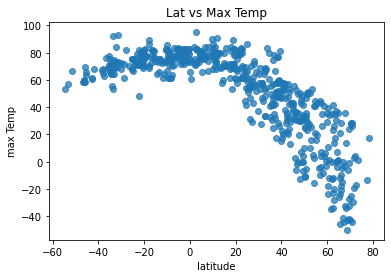

In [38]:

plt.scatter(city_df['lat'],city_df['max temp F'],marker='o',alpha=0.75)
plt.title("Lat vs Max Temp")
plt.xlabel('latitude')
plt.ylabel('max Temp')

## Latitude vs. Humidity Plot

Text(0, 0.5, 'humidity')

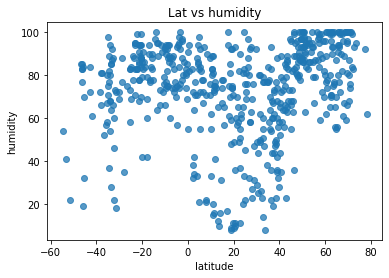

In [25]:
plt.scatter(city_df['lat'],city_df['humidity'],marker='o',alpha=0.75)
plt.title("Lat vs humidity")
plt.xlabel('latitude')
plt.ylabel('humidity')

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'cloudiness')

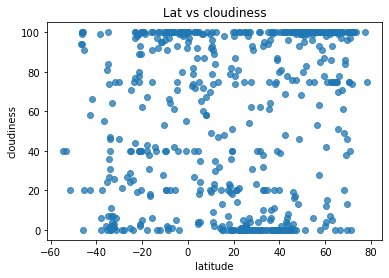

In [26]:
plt.scatter(city_df['lat'],city_df['cloudiness'],marker='o',alpha=0.75)
plt.title("Lat vs cloudiness")
plt.xlabel('latitude')
plt.ylabel('cloudiness')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'windspeed')

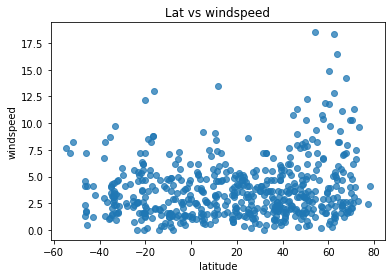

In [27]:
plt.scatter(city_df['lat'],city_df['windspeed'],marker='o',alpha=0.75)
plt.title("Lat vs windspeed")
plt.xlabel('latitude')
plt.ylabel('windspeed')

## Linear Regression

In [28]:
north_city_df = city_df[city_df['lat'] >= 0]
south_city_df = city_df[city_df['lat'] <= 0]
north_city_df['lat'] = north_city_df['lat'].astype(float)
south_city_df['lat'] = south_city_df['lat'].astype(float)

/var/folders/4s/j3_l93ts54qgnyg57c9s590m0000gn/T/ipykernel_75917/2994345698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_city_df['lat'] = north_city_df['lat'].astype(float)
/var/folders/4s/j3_l93ts54qgnyg57c9s590m0000gn/T/ipykernel_75917/2994345698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_city_df['lat'] = south_city_df['lat'].astype(float)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7089522512361862


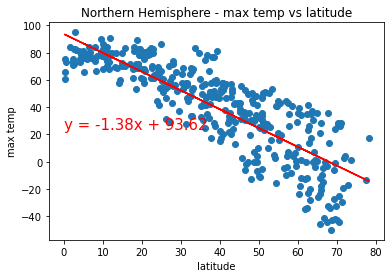

In [40]:
x_values = north_city_df['lat']
y_values = north_city_df['max temp F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,24),fontsize=15,color="red")
plt.title("Northern Hemisphere - max temp vs latitude")
plt.xlabel('latitude')
plt.ylabel('max temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.28223353787684957


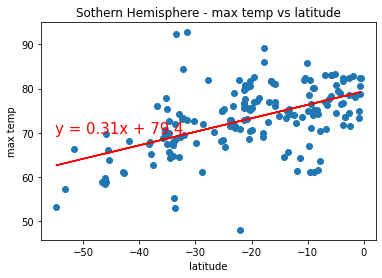

In [42]:
x_values = south_city_df['lat']
y_values = south_city_df['max temp F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")
plt.title("Sothern Hemisphere - max temp vs latitude")
plt.xlabel('latitude')
plt.ylabel('max temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1616320605836906


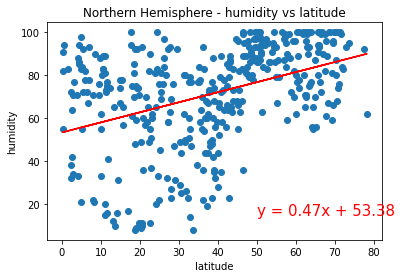

In [31]:
x_values = north_city_df['lat']
y_values = north_city_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.title("Northern Hemisphere - humidity vs latitude")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16121424710311816


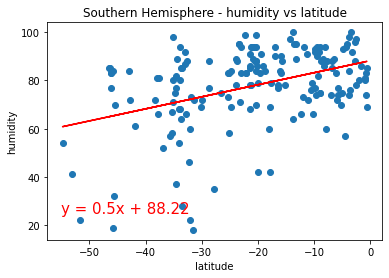

In [32]:
x_values = south_city_df['lat']
y_values = south_city_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title("Southern Hemisphere - humidity vs latitude")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06599256188171178


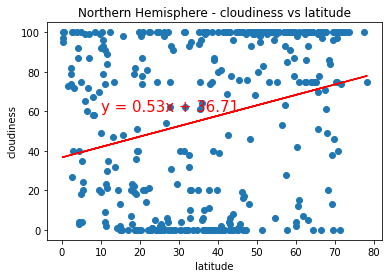

In [33]:
x_values = north_city_df['lat']
y_values = north_city_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.title("Northern Hemisphere - cloudiness vs latitude")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08628845373912343


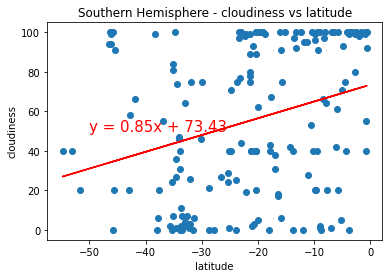

In [34]:
x_values = south_city_df['lat']
y_values = south_city_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - cloudiness vs latitude")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.045597787769601966


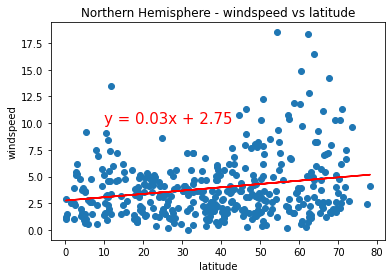

In [35]:
x_values = north_city_df['lat']
y_values = north_city_df['windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - windspeed vs latitude")
plt.xlabel('latitude')
plt.ylabel('windspeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01728063274400123


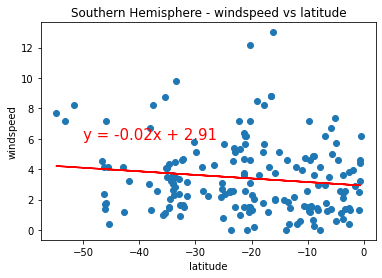

In [36]:
x_values = south_city_df['lat']
y_values = south_city_df['windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")
plt.title("Southern Hemisphere - windspeed vs latitude")
plt.xlabel('latitude')
plt.ylabel('windspeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()